In [285]:
import pandas as pd
import matplotlib.pyplot as plt
df_GDP=pd.read_csv("GDP.csv")
df_INF=pd.read_csv("INF.csv")
df_UNEMP=pd.read_csv("UNEMP.csv")

In [286]:
# First of all, as i want to perform a 30 year analysis on the 3 datasets (30 years is the best period talking about consistency in these dataset), i need to drop and clean 
df_GDP

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Unnamed: 68
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.962907e+09,2.983635e+09,3.092429e+09,3.276184e+09,3.395799e+09,2.481857e+09,2.929447e+09,3.279344e+09,3.648573e+09,NaN
1,Africa Eastern and Southern,AFE,GDP (current US$),NY.GDP.MKTP.CD,2.421063e+10,2.496398e+10,2.707880e+10,3.177575e+10,3.028579e+10,3.381317e+10,...,8.982778e+11,8.289428e+11,9.729989e+11,1.012306e+12,1.009721e+12,9.333918e+11,1.085745e+12,1.191423e+12,1.245472e+12,NaN
2,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.913422e+10,1.811657e+10,1.875346e+10,1.805322e+10,1.879944e+10,1.995593e+10,1.426000e+10,1.449724e+10,1.723305e+10,NaN
3,Africa Western and Central,AFW,GDP (current US$),NY.GDP.MKTP.CD,1.190495e+10,1.270788e+10,1.363076e+10,1.446909e+10,1.580376e+10,1.692109e+10,...,7.717669e+11,6.943610e+11,6.878492e+11,7.704950e+11,8.264838e+11,7.898017e+11,8.493124e+11,8.839739e+11,7.991060e+11,NaN
4,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,9.049642e+10,5.276162e+10,7.369015e+10,7.945069e+10,7.089796e+10,4.850156e+10,6.650513e+10,1.043997e+11,8.482465e+10,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,6.295848e+09,6.682677e+09,7.180765e+09,7.878760e+09,7.899738e+09,7.717145e+09,9.413404e+09,9.354903e+09,1.046822e+10,NaN
262,"Yemen, Rep.",YEM,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,4.244449e+10,3.131782e+10,2.684223e+10,2.160616e+10,NaN,NaN,NaN,NaN,NaN,NaN
263,South Africa,ZAF,GDP (current US$),NY.GDP.MKTP.CD,8.748597e+09,9.225996e+09,9.813996e+09,1.085420e+10,1.195600e+10,1.306899e+10,...,3.467098e+11,3.235855e+11,3.814488e+11,4.052607e+11,3.893300e+11,3.379747e+11,4.208869e+11,4.069200e+11,3.806993e+11,NaN
264,Zambia,ZMB,GDP (current US$),NY.GDP.MKTP.CD,6.987397e+08,6.823597e+08,6.792797e+08,7.043397e+08,8.226397e+08,1.061200e+09,...,2.125122e+10,2.095841e+10,2.587360e+10,2.631151e+10,2.330867e+10,1.813776e+10,2.209642e+10,2.916378e+10,2.757796e+10,NaN


In [287]:
df_GDP=df_GDP.drop(columns=['Country Code', 'Indicator Name', 'Indicator Code', 'Unnamed: 68'])
df_GDP.set_index('Country Name', inplace=True)
df_INF=df_INF.drop(columns=['Country Code', 'Indicator Name', 'Indicator Code', 'Unnamed: 68'])
df_INF.set_index('Country Name', inplace=True)
df_UNEMP=df_UNEMP.drop(columns=['Country Code', 'Indicator Name', 'Indicator Code', 'Unnamed: 68'])
df_UNEMP.set_index('Country Name', inplace=True)

In [288]:
df_GDP = df_GDP.loc[:, df_GDP.columns.astype(int) > 1993]
df_INF = df_INF.loc[:, df_INF.columns.astype(int) > 1993]
df_UNEMP = df_UNEMP.loc[:, df_UNEMP.columns.astype(int) > 1993]

In [289]:
#Good! Now that we have the same raws and columns for every dataframe, we need to check what is still NaN and drop
df_GDP.isnull().sum()
df_GDP=df_GDP.dropna().copy()
df_INF=df_INF.dropna().copy()

In [290]:
#Now as we want to work on the same countries in every Df, we need to filter them by index

common_index = df_GDP.index.intersection(df_UNEMP.index).intersection(df_INF.index)

# DF filtering 
df_GDP_filtered = df_GDP.loc[common_index]
df_UNEMP_filtered = df_UNEMP.loc[common_index]
df_INF_filtered = df_INF.loc[common_index]

In [291]:
row_number = df_INF_filtered.index.get_loc("Italy")
print(row_number) 

83


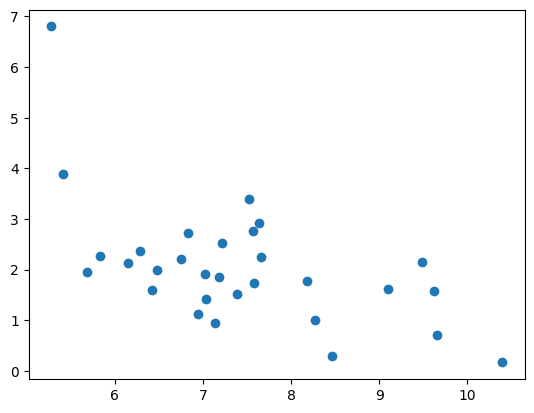

In [303]:
plt.scatter(df_UNEMP_filtered.loc['Canada'],df_INF_filtered.loc['Canada'])

In [305]:
df_UNEMP_filtered.loc['France'].corr(df_INF_filtered.loc['France'])

np.float64(-0.4433808890649002)